<a href="https://colab.research.google.com/github/JohnOliver23/DatasetsML/blob/master/projeto_topicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
import pandas
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Markdown as md
import matplotlib.pyplot as plt

raw_dataset_wine = pandas.read_csv( "https://raw.githubusercontent.com/kmlporto/machinelearning/master/database/wine.data" ,  delimiter=",",header=None, encoding="utf-8-sig") 
raw_dataset_balance_scale = pandas.read_csv( "https://raw.githubusercontent.com/JohnOliver23/DatasetsML/master/database/balance-scale.data" ,  delimiter=",",header=None, encoding="utf-8-sig") 
raw_dataset_abalone = pandas.read_csv( "https://raw.githubusercontent.com/JohnOliver23/DatasetsML/master/database/abalone.data" ,  delimiter=",",header=None, encoding="utf-8-sig")

In [296]:
# WINE DATASET TESTS

# Creating collections vars 
wine_test = raw_dataset_wine.sample(frac=0.2)
wine_fit = raw_dataset_wine.drop(wine_test.index)

# Creating result vars 
wine_results = {
    'tree': 0,
    'knn5': 0,
    'knn10': 0,
    'mlp1': 0,
    'mlp2': 0,
    'kmeans': 0
} 

# X and Y vars 
wine_x = wine_fit[[1,2,3,4,5,6,7,8,9,10,11,12,13]]
wine_y = wine_fit[[0]]

# Binary Tree Fit and Tests 
wine_tree = tree.DecisionTreeClassifier()
wine_tree.fit(wine_x,wine_y)
wine_tree.fit(wine_x,wine_y)
wine_tree.fit(wine_x,wine_y)
wine_tree.fit(wine_x,wine_y)
wine_tree.fit(wine_x,wine_y)
wine_test_result = wine_tree.predict(wine_test[[1,2,3,4,5,6,7,8,9,10,11,12,13]])

i = 0
acceptResult = 0
for data in  wine_test[0] :
    if(data == wine_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

wine_results['tree']    = acceptResult/wine_test_result.size * 100

# KNN n=5 Fit and Tests 
wine_knn5 = KNeighborsClassifier(weights='distance', n_neighbors=5)
wine_knn5.fit(wine_x,wine_y)
wine_test_result = wine_knn5.predict(wine_test[[1,2,3,4,5,6,7,8,9,10,11,12,13]])

i = 0
acceptResult = 0
for data in  wine_test[0] :
    if(data == wine_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

wine_results['knn5'] = acceptResult/wine_test_result.size * 100

# KNN n=10 Fit and Tests 
wine_knn10 = KNeighborsClassifier(weights='distance', n_neighbors=10)
wine_knn10.fit(wine_x,wine_y)
wine_test_result = wine_knn10.predict(wine_test[[1,2,3,4,5,6,7,8,9,10,11,12,13]])

i = 0
acceptResult = 0
for data in  wine_test[0] :
    if(data == wine_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

wine_results['knn10'] = acceptResult/wine_test_result.size * 100

# MLP1 Fit and Tests
#wine_mlp1 = MLPClassifier(hidden_layer_sizes=(100,100,0), max_iter=1000, alpha=0.0001,solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
wine_mlp1 = MLPClassifier(hidden_layer_sizes=(5, 2))
wine_mlp1.fit(wine_x,wine_y, )
wine_test_result = wine_mlp1.predict(wine_test[[1,2,3,4,5,6,7,8,9,10,11,12,13]])

i = 0
acceptResult = 0
for data in  wine_test[0] :
    if(data == wine_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

wine_results['mlp1'] = acceptResult/wine_test_result.size * 100



# MLP2 Fit and Tests 
wine_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5))
wine_mlp2.fit(wine_x,wine_y)
wine_test_result = wine_mlp2.predict(wine_test[[1,2,3,4,5,6,7,8,9,10,11,12,13]])

i = 0
acceptResult = 0
for data in  wine_test[0] :
    if(data == wine_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

wine_results['mlp2'] = acceptResult/wine_test_result.size * 100


# Kmeans Fit and Tests 
wine_km = KMeans(n_clusters=3)
wine_km.fit(wine_x,wine_y)
wine_test_result = wine_km.predict(wine_test[[1,2,3,4,5,6,7,8,9,10,11,12,13]])

i = 0
acceptResult = 0
for data in  wine_test[0] :
    if(data == wine_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

wine_results['kmeans'] = acceptResult/wine_test_result.size * 100

x = raw_dataset_wine.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]].values
kmeans = KMeans(n_clusters=3)#muda de acordo com as classes
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

kmeans.cluster_centers_

ErrorWineKm =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    ErrorWineKm.append(kmeans.inertia_)

print(wine_results)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/d

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]
{'tree': 88.88888888888889, 'knn5': 63.888888888888886, 'knn10': 61.111111111111114, 'mlp1': 25.0, 'mlp2': 36.11111111111111, 'kmeans': 52.77777777777778}


In [266]:
# BALANCE SCALE DATASET TESTS

# Creating collections vars 
balance_scale_test = raw_dataset_balance_scale.sample(frac=0.2)
balance_scale_fit = raw_dataset_balance_scale.drop(balance_scale_test.index)

# Creating result vars 
balance_scale_results = {
    'tree': 0,
    'knn5': 0,
    'knn10': 0,
    'mlp1': 0,
    'mlp2': 0,
    'kmeans': 0
} 

# X and Y vars 
balance_scale_x = balance_scale_fit[[1,2,3,4]]
balance_scale_y = balance_scale_fit[[0]]

# Binary Tree Fit and Tests 
balance_scale_tree = tree.DecisionTreeClassifier()
balance_scale_tree.fit(balance_scale_x,balance_scale_y)
balance_scale_tree.fit(balance_scale_x,balance_scale_y)
balance_scale_tree.fit(balance_scale_x,balance_scale_y)
balance_scale_tree.fit(balance_scale_x,balance_scale_y)
balance_scale_tree.fit(balance_scale_x,balance_scale_y)
balance_scale_test_result = balance_scale_tree.predict(balance_scale_test[[1,2,3,4]])

i = 0
acceptResult = 0
for data in  balance_scale_test[0] :
    if(data == balance_scale_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

balance_scale_results['tree']    = acceptResult/balance_scale_test_result.size * 100

# KNN n=5 Fit and Tests 
balance_scale_knn5 = KNeighborsClassifier(weights='distance', n_neighbors=5)
balance_scale_knn5.fit(balance_scale_x,balance_scale_y)
balance_scale_test_result = balance_scale_knn5.predict(balance_scale_test[[1,2,3,4]])

i = 0
acceptResult = 0
for data in  balance_scale_test[0] :
    if(data == balance_scale_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

balance_scale_results['knn5'] = acceptResult/balance_scale_test_result.size * 100

# KNN n=10 Fit and Tests 
balance_scale_knn10 = KNeighborsClassifier(weights='distance', n_neighbors=10)
balance_scale_knn10.fit(balance_scale_x,balance_scale_y)
balance_scale_test_result = balance_scale_knn10.predict(balance_scale_test[[1,2,3,4]])

i = 0
acceptResult = 0
for data in  balance_scale_test[0] :
    if(data == balance_scale_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

balance_scale_results['knn10'] = acceptResult/balance_scale_test_result.size * 100

# MLP1 Fit and Tests
#balance_scale_mlp1 = MLPClassifier(hidden_layer_sizes=(100,100,0), max_iter=1000, alpha=0.0001,solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
balance_scale_mlp1 = MLPClassifier(hidden_layer_sizes=(5, 2))
balance_scale_mlp1.fit(balance_scale_x,balance_scale_y, )
balance_scale_test_result = balance_scale_mlp1.predict(balance_scale_test[[1,2,3,4]])

i = 0
acceptResult = 0
for data in  balance_scale_test[0] :
    if(data == balance_scale_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

balance_scale_results['mlp1'] = acceptResult/balance_scale_test_result.size * 100

# MLP2 Fit and Tests 
balance_scale_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5))
balance_scale_mlp2.fit(balance_scale_x,balance_scale_y)
balance_scale_test_result = balance_scale_mlp2.predict(balance_scale_test[[1,2,3,4]])

i = 0
acceptResult = 0
for data in  balance_scale_test[0] :
    if(data == balance_scale_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

balance_scale_results['mlp2'] = acceptResult/balance_scale_test_result.size * 100


# Kmeans Fit and Tests 
balance_scale_km = KMeans(n_clusters=3)
balance_scale_km.fit(balance_scale_x,balance_scale_y)
balance_scale_test_result = balance_scale_km.predict(balance_scale_test[[1,2,3,4]])

i = 0
acceptResult = 0
for data in  balance_scale_test[0] :
    if(data == balance_scale_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

balance_scale_results['kmeans'] = acceptResult/balance_scale_test_result.size * 100

print(balance_scale_results)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/d

{'tree': 75.2, 'knn5': 78.4, 'knn10': 87.2, 'mlp1': 84.8, 'mlp2': 85.6, 'kmeans': 0.0}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [267]:
# ABALONE SCALE DATASET TESTS

# Creating collections vars 
abalone_test = raw_dataset_abalone.sample(frac=0.2)
abalone_fit = raw_dataset_abalone.drop(abalone_test.index)

# Creating result vars 
abalone_results = {
    'tree': 0,
    'knn5': 0,
    'knn10': 0,
    'mlp1': 0,
    'mlp2': 0,
    'kmeans': 0
} 

# X and Y vars 
abalone_x = abalone_fit[[1,2,3,4,5,6,7,8]]
abalone_y = abalone_fit[[0]]

# Binary Tree Fit and Tests 
abalone_tree = tree.DecisionTreeClassifier()
abalone_tree.fit(abalone_x,abalone_y)
abalone_tree.fit(abalone_x,abalone_y)
abalone_tree.fit(abalone_x,abalone_y)
abalone_tree.fit(abalone_x,abalone_y)
abalone_tree.fit(abalone_x,abalone_y)
abalone_test_result = abalone_tree.predict(abalone_test[[1,2,3,4,5,6,7,8]])

i = 0
acceptResult = 0
for data in  abalone_test[0] :
    if(data == abalone_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

abalone_results['tree']    = acceptResult/abalone_test_result.size * 100

# KNN n=5 Fit and Tests 
abalone_knn5 = KNeighborsClassifier(weights='distance', n_neighbors=5)
abalone_knn5.fit(abalone_x,abalone_y)
abalone_test_result = abalone_knn5.predict(abalone_test[[1,2,3,4,5,6,7,8]])

i = 0
acceptResult = 0
for data in  abalone_test[0] :
    if(data == abalone_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

abalone_results['knn5'] = acceptResult/abalone_test_result.size * 100

# KNN n=10 Fit and Tests 
abalone_knn10 = KNeighborsClassifier(weights='distance', n_neighbors=10)
abalone_knn10.fit(abalone_x,abalone_y)
abalone_test_result = abalone_knn10.predict(abalone_test[[1,2,3,4,5,6,7,8]])

i = 0
acceptResult = 0
for data in  abalone_test[0] :
    if(data == abalone_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

abalone_results['knn10'] = acceptResult/abalone_test_result.size * 100

# MLP1 Fit and Tests
#abalone_mlp1 = MLPClassifier(hidden_layer_sizes=(100,100,0), max_iter=1000, alpha=0.0001,solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
abalone_mlp1 = MLPClassifier(hidden_layer_sizes=(5, 2))
abalone_mlp1.fit(abalone_x,abalone_y, )
abalone_test_result = abalone_mlp1.predict(abalone_test[[1,2,3,4,5,6,7,8]])

i = 0
acceptResult = 0
for data in  abalone_test[0] :
    if(data == abalone_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

abalone_results['mlp1'] = acceptResult/abalone_test_result.size * 100

# MLP2 Fit and Tests 
abalone_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5))
abalone_mlp2.fit(abalone_x,abalone_y)
abalone_test_result = abalone_mlp2.predict(abalone_test[[1,2,3,4,5,6,7,8]])

i = 0
acceptResult = 0
for data in  abalone_test[0] :
    if(data == abalone_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

abalone_results['mlp2'] = acceptResult/abalone_test_result.size * 100


# Kmeans Fit and Tests 
abalone_km = KMeans(n_clusters=3)
abalone_km.fit(abalone_x,abalone_y)
abalone_test_result = abalone_km.predict(abalone_test[[1,2,3,4,5,6,7,8]])

i = 0
acceptResult = 0
for data in  abalone_test[0] :
    if(data == abalone_test_result[i]):
        acceptResult = acceptResult + 1
    i = i+1

abalone_results['kmeans'] = acceptResult/abalone_test_result.size * 100

print(abalone_results)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/d

{'tree': 48.862275449101794, 'knn5': 50.778443113772454, 'knn10': 52.33532934131736, 'mlp1': 51.616766467065865, 'mlp2': 51.73652694610779, 'kmeans': 0.0}


# **Relatório de desempenho dos algoritimos**

## **Wine**

##### **Resultados Algoritmos**

In [291]:
pd.DataFrame.from_dict(wine_results, orient='index')

,0
tree,94.444444
knn5,80.555556
knn10,83.333333
mlp1,41.666667
mlp2,52.777778
kmeans,5.555556


##### **Curva de taxa de erro em iterações da MLP1**

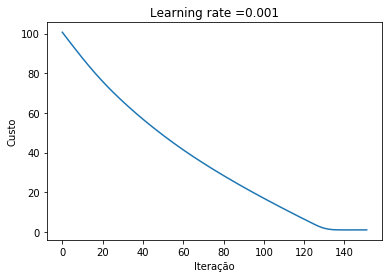

In [292]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(wine_mlp1.loss_curve_)

##### **Curva de taxa de erro em iterações da MLP2**

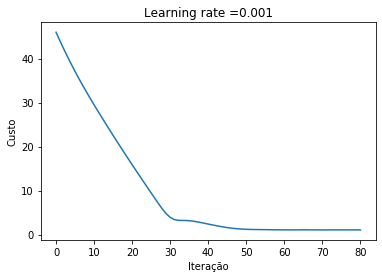

In [293]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(wine_mlp2.loss_curve_)

##### **Curva de taxa de erro em iterações K-means**

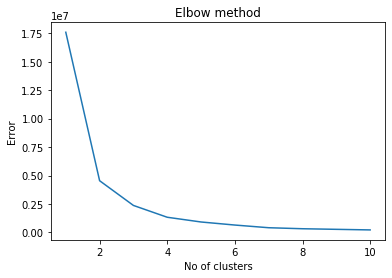

In [297]:


plt.plot(range(1, 11), ErrorWineKm)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

## **Balance Scale**

In [180]:
pd.DataFrame.from_dict(balance_scale_results, orient='index')

,0
tree,76.0
knn5,84.8
knn10,91.2
mlp1,79.2
mlp2,89.6
kmeans,0.0


##### **Curva de taxa de erro em iterações da MLP1**

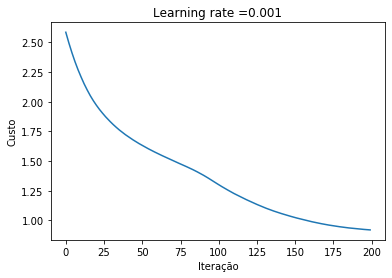

In [220]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(balance_scale_mlp1.loss_curve_)

##### **Curva de taxa de erro em iterações da MLP2**

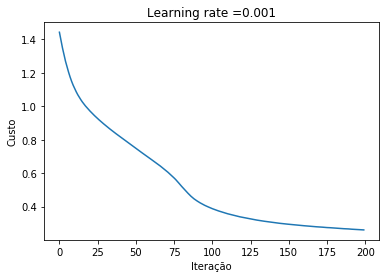

In [223]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(balance_scale_mlp2.loss_curve_)

##### **Curva de taxa de erro em iterações K-means**

## **Abalone**

In [181]:
pd.DataFrame.from_dict(abalone_results, orient='index')

,0
tree,48.143713
knn5,54.371257
knn10,54.610778
mlp1,38.802395
mlp2,54.371257
kmeans,0.000000


##### **Curva de taxa de erro em iterações da MLP1**

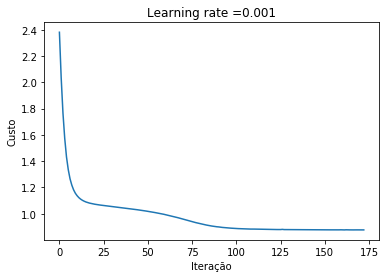

In [221]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(abalone_mlp1.loss_curve_)

##### **Curva de taxa de erro em iterações da MLP2**


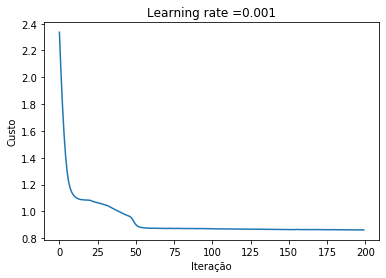

In [222]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(abalone_mlp2.loss_curve_)

##### **Curva de taxa de erro em iterações K-means**